In [1]:

%matplotlib inline   
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#RIMPIAZZANDO I PREZZI
df = pd.read_csv('training.csv') 

#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

#Sostituzione missing values colonna TopThreeAmericanName
df.loc[15769,'TopThreeAmericanName']='GM' 
df.loc[18532,'TopThreeAmericanName']='CHRYSLER'
df.loc[20016,'TopThreeAmericanName']='CHRYSLER'
df.loc[35157,'TopThreeAmericanName']='CHRYSLER'

#Rimpiazzo i valori nulli di Nationality con AMERICAN perche' i 4 che mancavano di TopThreeAmericanName erano tutti americani
df['Nationality'] = df['Nationality'].fillna('AMERICAN')

#IMPORTANTE: Siccome le righe con valori nulli di Color e SubModel sono gli stessi (e sono solo 7) li togliamo:
df=df.dropna(subset=['SubModel', 'Color']) 

#Rimpiazzati i missing values di Transmission (con la moda fra le macchine dello stesso modello (e stesso Make))
df['Transmission'] = df['Transmission'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mode()[0])) #faccio la moda perche' sono 'Transimission' stringhe

#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
df['Trim']=df['Trim'].astype(str) 
df['Trim'] = df['Trim'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['Trim'] = df.groupby(['Make','Model', 'SubModel']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby(['Make','Model']).Trim.apply(
   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
df['WheelType']=df['WheelType'].astype(str) 
df['WheelType'] = df['WheelType'].replace('nan', -5)
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
#df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
  #  lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
 #   lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)
#df['WheelType'] = df.groupby('Make').WheelType.apply(
#    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
#)


#eliminiamo Primeunit e AUCGUART perche' mancano 55703 valori
df = df.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

#eliminiamo BYRNO, RefId, VNZIP1 e WheelTypeID perche' non forniscono informazione
df = df.drop(['BYRNO', 'RefId','WheelTypeID'], axis=1)

#Togliamo le righe che hanno Size o Trim np.nan (4 di Size e 1 di Trim)
df=df.dropna(subset=['Size','Trim'])

#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
df['VehBCost'] = df['VehBCost'].replace(1, np.nan)
df['VehBCost'] = df['VehBCost'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df=df[df['VehicleAge']>0] #Tolgo una riga con VehicleAge=0 sennò non posso calcolare MilesPerYear
#Aggiunta di una nuova colonna
df['MilesPerYear'] = df['VehOdo'] / df['VehicleAge']




#------------------------------------------------- KMeans ------------------------------------------------------------
#1) eliminare i categorici con pochi valori per vedere se SSE si abbassa; eliminare IsOnlineSale, VehYear. fare KMeans con Z-score e salvare l'immagine

#2) provare MiniMax e salvare l'immagine

#3) scegliere un k e una normalizzazione (cio' che minimizza SSE) e concentrarsi su quelli.

#4) eseguire  (rivedere il codice...)
#kmeans = KMeans(n_clusters=__ktrovato__, n_init=10, max_iter=300)
#kmeans.fit(X)
#kmeans.labels_[:5]
#np.unique(kmeans.labels_, return_counts=True)
#hist, bins = np.histogram(kmeans.labels_, 
#                          bins=range(0, len(set(kmeans.labels_)) + 1))
#dict(zip(bins, hist))

#5) stampare SSE e Silhouette_Score

#6) stampare tutti i grafici per tutte le coppie 
#for column1 in df:
#    for column2 in range(column1 + 1, len(df)): 
#        plt.scatter(df['sepal length'], df['petal width'], 
#                    c=kmeans.labels_, s=20)
#        plt.tick_params(axis='both', which='major', labelsize=22)
#        plt.show()

#--------------------------------------------------DBSCAN ------------------------------------------------------
#1) togliere i categorici e quelli tolti in KMeans
#2) provare min_sample da 5 a 100 a passi di 5 e salvare il grafico.
#3) a mano ricavare il best eps dal grafico (non si puo' automatizzare)
#4) stampare silhouette_coeff per ogni risultato
#5) trovare best silhouette_coeff e tenere la coppia (eps, min_sample) con il migliore silhouette_coeff
#6) trovato la best coppia (eps, min_sample) fare i cluster di tutte le coppie

#-------------------------------------------------- Hierarcical -------------------------------------------------

#1)studiare
df['DiffAcquisition_CurrentRetailAveragePrice']=df['MMRAcquisitionRetailAveragePrice']-df['MMRCurrentRetailAveragePrice']
df['VehBCost_f_VehicleAge'] = df['VehBCost']/ df['VehicleAge']
df['DiffAcquisition_CurrentAuctionAveragePrice']=df['MMRAcquisitionAuctionAveragePrice']-df['MMRCurrentAuctionAveragePrice']
df['DiffAcquisition_CurrentAuctionCleanPrice']=df['MMRAcquisitionAuctionCleanPrice']-df['MMRCurrentAuctionCleanPrice']
#------------------------------------------- CLUSTERING -------------------------------------------------------------

#eliminazione classe da predire
classes = df['IsBadBuy'] 
del df['IsBadBuy']

#sostituzione attributi non numerici con attributi numerici, e cancellazione delle colonne non utili per il cluster
del df['PurchDate']
del df['SubModel'] #son troppi
del df['Model']
del df['Nationality']
del df['TopThreeAmericanName']
del df['VNST']
del df['Color']
del df['Trim']
del df['Auction'] #son troppi
del df['Make']
del df['Size']
del df['Transmission']
 #del df['WheelType']
del df['IsOnlineSale']
del df['VehYear']
del df['MilesPerYear']
del df['MMRAcquisitionAuctionAveragePrice'] 
del df['MMRAcquisitionAuctionCleanPrice'] 
del df['MMRAcquisitionRetailAveragePrice']
del df['MMRAcquisitonRetailCleanPrice']
del df['MMRCurrentAuctionAveragePrice']
del df['MMRCurrentAuctionCleanPrice']
del df['MMRCurrentRetailAveragePrice']
del df['MMRCurrentRetailCleanPrice']
del df['VehicleAge']
del df['VehBCost']
del df['WarrantyCost']
del df['VNZIP1']

df.loc[df['WheelType']=="Alloy", 'WheelType']= 1
df.loc[df['WheelType']=="Covers", 'WheelType']= 2
df.loc[df['WheelType']=="Special", 'WheelType']= 3

#DBSCAN SCELTO PER RIMOZIONE OUTLIER
from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Primo tipo di normalizzazione: Z-Score 
scaler = StandardScaler()
X = scaler.fit_transform(df.values)


dbscan = DBSCAN(eps=1.2, min_samples=35)
dbscan.fit(X)
#RIMOZIONE NOISE POINTS, che sono etichettati in dbscan dal label -1, df_filtered sarà df senza outlier
df['IsBadBuy']=classes
df['dblabels'] = dbscan.labels_
df_filtered = df[df.dblabels>-1]
del df['IsBadBuy']
del df_filtered['dblabels']
classi=df_filtered['IsBadBuy']
del df_filtered['IsBadBuy']

In [2]:
scaler = StandardScaler()
X = scaler.fit_transform(df_filtered.values)

In [3]:
df_filtered


,WheelType,VehOdo,DiffAcquisition_CurrentRetailAveragePrice,VehBCost_f_VehicleAge,DiffAcquisition_CurrentAuctionAveragePrice,DiffAcquisition_CurrentAuctionCleanPrice
0,2,61184,535.0,3050.000000,168.0,20.0
1,2,92383,0.0,1333.333333,0.0,0.0
2,2,45965,352.0,3750.000000,570.0,478.0
3,2,80169,0.0,1181.250000,0.0,0.0
4,1,77372,64.0,1417.500000,60.0,-178.0
...,...,...,...,...,...,...
58381,1,78226,622.0,2401.666667,38.0,262.0
58382,1,71169,-24.0,1172.500000,-250.0,-324.0
58383,2,69795,972.0,2333.333333,154.0,104.0
58384,1,85326,611.0,1105.000000,213.0,249.0


In [4]:
start = datetime.now()

#Per Hiararchical
#Si fa un sample di grandezza 20% del dataset iniziale (11525 righe), lanciando K-Means con k=11525 e prendendo i centroidi trovati
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=11525, n_init=6, max_iter=100)
kmeans.fit(X)

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

4740 seconds needed


4 seconds needed


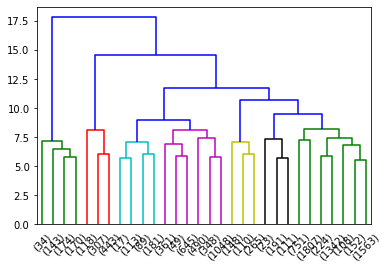

In [20]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
start = datetime.now()
X=kmeans.cluster_centers_
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=8.3, truncate_mode='lastp')

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

8 seconds needed


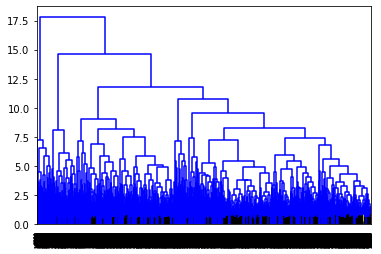

In [6]:
start = datetime.now()

res = dendrogram(data_link, color_threshold=1.0)

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

1 seconds needed


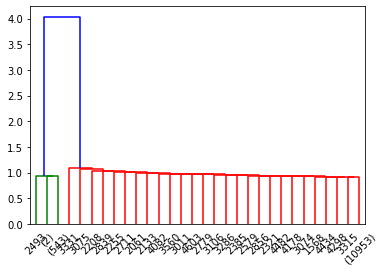

In [43]:
start = datetime.now()

data_dist = pdist(X, metric='seuclidean')
data_link = linkage(data_dist, method='single', metric='seuclidean')
res = dendrogram(data_link, color_threshold=1.4, truncate_mode='lastp')

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))

4 seconds needed


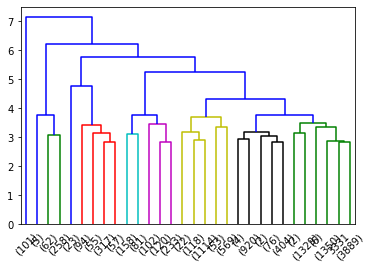

In [24]:
start = datetime.now()

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=3.7, truncate_mode='lastp')

end = datetime.now()
print( "{} seconds needed".format((end - start).seconds))